In [267]:
import numpy as np 
import matplotlib.pyplot as plt 

In [268]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [269]:
x_train.shape # 2 örnek var

(2,)

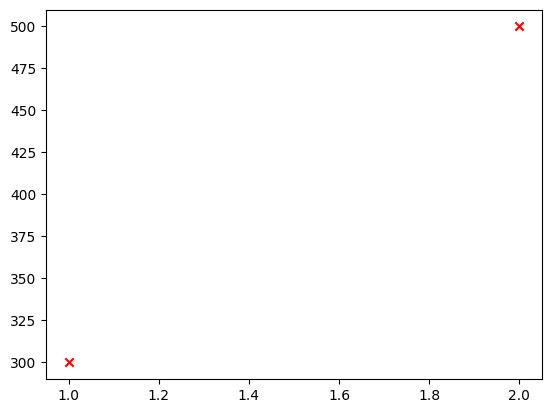

In [270]:
plt.scatter(x_train, y_train, marker="x", c="r")

## Doğruyu çizdiriyoruz

In [271]:
def compute_model_output(x, w, b):
    m = x_train.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

In [272]:
w, b = 200, 100 
tmp_f_wb = compute_model_output(x_train, w, b)

In [273]:
tmp_f_wb

array([300., 500.])

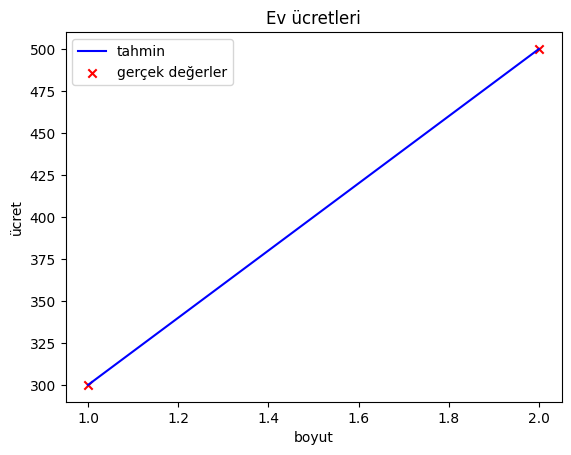

In [274]:
plt.plot(x_train, tmp_f_wb, c="b", label="tahmin")
plt.scatter(x_train, y_train, marker="x", c="r", label="gerçek değerler")
plt.title("Ev ücretleri")
plt.xlabel("boyut")
plt.ylabel("ücret")
plt.legend()
plt.show()

## cost fonksiyonu

In [275]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        cost_sum += ((w * x[i] + b) - y[i]) ** 2
        cost_sum /= (2*m)
    return cost_sum

In [278]:
compute_cost(x_train, y_train, 200, 100) # hata bu örnek için sıfır

np.float64(0.0)

In [279]:
def predict(x,w,b):
    return w * x + b

In [280]:
predict(1.2, 200, 100) # bin dolar bazında tahmin

340.0

-------

# Linear regression gradient descent

In [281]:
compute_cost(x_train, y_train, 150, 90) 
print(f"Maliyet: {compute_cost(x_train, y_train, 150, 90) }")

Maliyet: 3250.0


## Gradient descent 

In [286]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = (w * x[i] + b) - y[i]
        dj_dw += f_wb * x[i]
        dj_db += f_wb 
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [287]:
compute_gradient(x_train, y_train, 90, 100)

(np.float64(-275.0), np.float64(-165.0))

## Doğrusal regresyon için birkaç örnek 

In [290]:
import numpy as np 
import matplotlib.pyplot as plt 

In [291]:
x_train = np.array([50, 75, 100, 125, 150])
y_train = np.array([200000, 275000, 350000, 425000, 500000])

In [292]:
x_train.shape

(5,)

Text(0, 0.5, 'fiyat (bin tl)')

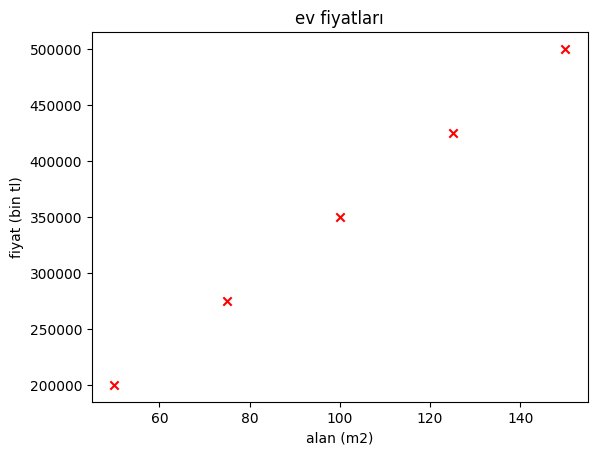

In [293]:
plt.scatter(x_train, y_train, marker="x", c="r")
plt.title("ev fiyatları")
plt.xlabel("alan (m2)")
plt.ylabel("fiyat (bin tl)")



In [294]:
tahminlerimiz = compute_model_output(x_train, 3000, 50000)
tahminlerimiz

array([200000., 275000., 350000., 425000., 500000.])

In [295]:
compute_cost(x_train, y_train, 3000, 50000)

np.float64(0.0)

Text(0, 0.5, 'fiyat')

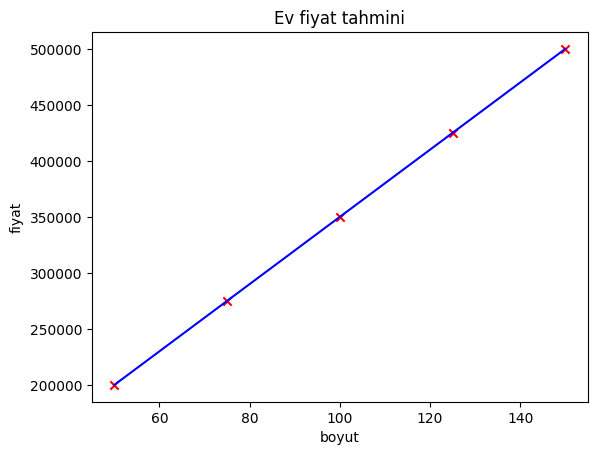

In [297]:
plt.scatter(x_train,y_train, marker="x", c="r")
plt.plot(x_train, tahminlerimiz, c="b", label="Tahminlerimiz")
plt.title("Ev fiyat tahmini")
plt.xlabel("boyut")
plt.ylabel("fiyat")

----
# Örnekler

## Araba hızı ve fren mesafesi

In [298]:
hız = np.array([20, 40, 60, 80, 100, 120, 140, 160, 180, 200])
fren_mesafesi = np.array([55, 105, 155, 205, 255, 305, 355, 405, 455, 505])

In [299]:
hız.shape

(10,)

Text(0, 0.5, 'Fren mesafesi')

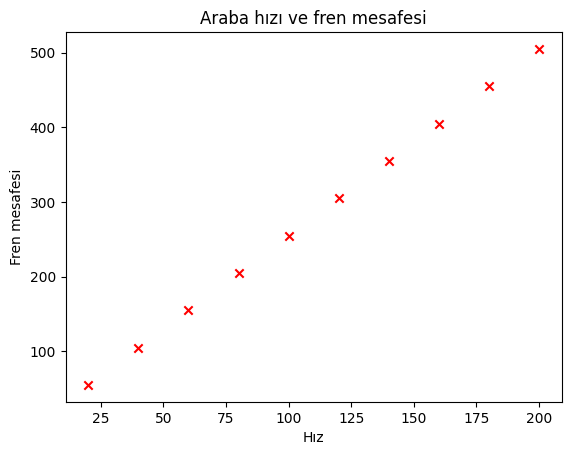

In [300]:
plt.scatter(hız, fren_mesafesi ,marker="x", c="r")
plt.title("Araba hızı ve fren mesafesi")
plt.xlabel("Hız")
plt.ylabel("Fren mesafesi")

In [329]:
x_train = np.array([20, 40, 60, 80, 100, 120, 140, 160, 180, 200])
y_train = np.array([55, 105, 155, 205, 255, 305, 355, 405, 455, 505])

def compute_gradient(x, y, w, b):
    m = len(x)  
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b  
        dj_dw += (f_wb - y[i]) * x[i] 
        dj_db += f_wb - y[i]  
    
    dj_dw /= m  
    dj_db /= m  
    return dj_dw, dj_db

def compute_cost(x, y, w, b):
    m = len(x)
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i]) ** 2
    
    total_cost = cost / (2 * m) 
    return total_cost

def gradient_descent(x, y, w, b, alpha, iteration):

    for i in range(iteration):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w -= alpha * dj_dw  
        b -= alpha * dj_db  
        
        cost = compute_cost(x, y, w, b)

        print(f"Epoch {i+1}/{iteration}\t w: {w:.4f} - b: {b:.4f} - cost: {cost:.4f}")
    return w, b


In [330]:
w, b = gradient_descent(x_train, y_train, 0, 0, 0.0001, 20)

print("w:", w)
print("b:", b)


Epoch 1/20	 w: 3.9050 - b: 0.0280 - cost: 14443.9303
Epoch 2/20	 w: 1.7960 - b: 0.0130 - cost: 4214.9592
Epoch 3/20	 w: 2.9350 - b: 0.0213 - cost: 1231.3231
Epoch 4/20	 w: 2.3199 - b: 0.0170 - cost: 361.0415
Epoch 5/20	 w: 2.6521 - b: 0.0195 - cost: 107.1935
Epoch 6/20	 w: 2.4727 - b: 0.0183 - cost: 33.1497
Epoch 7/20	 w: 2.5696 - b: 0.0191 - cost: 11.5522
Epoch 8/20	 w: 2.5172 - b: 0.0188 - cost: 5.2525
Epoch 9/20	 w: 2.5455 - b: 0.0191 - cost: 3.4149
Epoch 10/20	 w: 2.5302 - b: 0.0191 - cost: 2.8788
Epoch 11/20	 w: 2.5385 - b: 0.0193 - cost: 2.7223
Epoch 12/20	 w: 2.5340 - b: 0.0194 - cost: 2.6766
Epoch 13/20	 w: 2.5364 - b: 0.0195 - cost: 2.6632
Epoch 14/20	 w: 2.5351 - b: 0.0196 - cost: 2.6592
Epoch 15/20	 w: 2.5358 - b: 0.0197 - cost: 2.6580
Epoch 16/20	 w: 2.5354 - b: 0.0198 - cost: 2.6575
Epoch 17/20	 w: 2.5356 - b: 0.0199 - cost: 2.6573
Epoch 18/20	 w: 2.5355 - b: 0.0200 - cost: 2.6572
Epoch 19/20	 w: 2.5356 - b: 0.0201 - cost: 2.6570
Epoch 20/20	 w: 2.5356 - b: 0.0202 - cost: 

# Multivariable

In [331]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460,232,178])

In [332]:
x_train.shape

(3, 4)

In [333]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [334]:
w_init.shape

(4,)

In [335]:
x_vec = x_train[0,:]

In [336]:
# BENİM
def predict(x, w, b):
    return np.dot(x,w) + b

In [337]:
predict(x_vec, w_init, b_init)

np.float64(459.9999976194083)

In [338]:
# BENİM
def compute_model_output(x, w, b):
    return x_train @ w_init + b_init

In [339]:
compute_model_output(x_train, w_init, b_init)

array([459.99999762, 231.99999837, 177.99999899])

In [340]:
# BENİM
def compute_cost(x,y,w,b):
    m = x.shape[0]
    f_wb = compute_model_output(x,w,b)
    cost = np.sum((f_wb - y) ** 2) / (2 * m)
    return cost

In [341]:
compute_cost(x_train, y_train, w_init, b_init)

np.float64(1.5578904045996674e-12)

In [342]:
def compute_cost(x, y, w, b):
    m = x.shape[0]

    cost = 0
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b
        cost += (f_wb_i - y[i] ) ** 2
    cost = cost / (2 * m)
    return cost
    
compute_cost(x_train, y_train, w_init, b_init)

np.float64(1.5578904428966628e-12)

In [343]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros((4,))
    dj_db = 0
    for i in range(m):
        err = (np.dot(x[i],w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i,j]
        dj_db += err
    dj_db = dj_db / m
    dj_dw = dj_dw / m

    return dj_dw, dj_db

In [344]:
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]


--------